In [1]:
import pandas as pd #for building dataframes from CSV files
import seaborn as sns #for fancy charts
import numpy as np #for np.nan
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
data = pd.read_excel('Corrections.xlsx')
num_rows = data.shape[0]
print("Number of rows:", num_rows)
data=data.fillna(0)

Number of rows: 150


In [3]:
data['Number of Children Age 2:'] = (data['Childunder2years1'] >= 6).astype(int)+(data['Childunder2years2'] >= 6).astype(int)

In [5]:

data['Number of Children 6months-5'] = data['Number of Children Age 2:'] + data['Number of Children Aged 3: '] + data['Number of Children Aged 4: '] + data['Number of Children Aged 5: ']


In [6]:
print(data.columns)


Index(['start', 'end', 'Household Number (Code): ', 'Village:', 'Subcounty',
       'Phase',
       'Total number of people living in the household (most of the time):',
       'Respondent Age: ', 'Childunder2years1', 'Childunder2years2',
       'Number of Children Aged 3: ', 'Number of Children Aged 4: ',
       'Number of Children Aged 5: ', 'Solidfoodsage', 'Vegetablesage',
       'Liquids', 'Liquids/1. Breast Milk ',
       'Liquids/2. Infant Formula (such as cerelac)',
       'Liquids/3. Milk (Fresh cow milk, condensed milk, powdered milk) or yogurt',
       'Liquids/4. Coffee or Tea', 'Liquids/5. Fresh Fruit Juice',
       'Liquids/6.  Soda', 'Liquids/7. Other Liquids', '8. Basic Foods',
       '9. Orange/Yellow Vegetables & Starches', '10. Other Starches',
       '11. Dark Leafy Greens', '12. Other Vegetables',
       '13. Vitamin A Rich Fruits', '14. Other Fruits', '15. Meats',
       '16. Eggs', '17. Fish', '18. Beans and Nuts', '19. Sweets',
       '20. Sugars', '21. Packaged

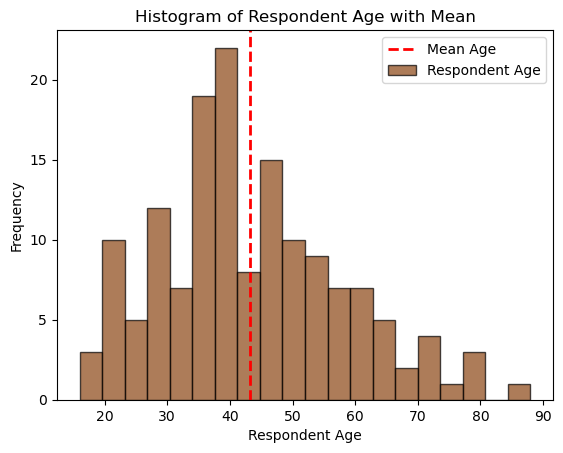

In [7]:
# Calculate the mean age
mean_age = data['Respondent Age: '].mean()

# Create the histogram
plt.hist(data['Respondent Age: '].dropna(), bins=20, alpha=0.7, color='saddlebrown', edgecolor='black')

# Draw a vertical line at the mean age
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2)

# Add a legend
plt.legend(['Mean Age', 'Respondent Age'])

# Add titles and labels
plt.title('Histogram of Respondent Age with Mean')
plt.xlabel('Respondent Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()


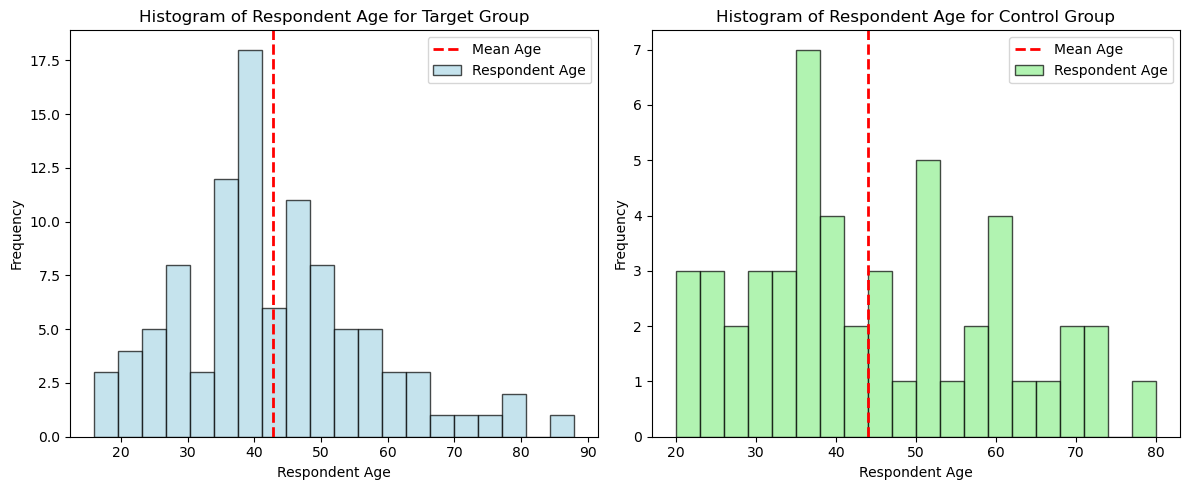

In [8]:
data['Target Binary'] = data['Household Number (Code): '].apply(lambda x: 1 if x > 200 else 0)

# Filter data for the target group ('Target Binary' == 1)
target_data = data[data['Target Binary'] == 1]
# Calculate the mean age for the target group
mean_age_target = target_data['Respondent Age: '].mean()

# Filter data for the control group ('Target Binary' == 0)
control_data = data[data['Target Binary'] == 0]
# Calculate the mean age for the control group
mean_age_control = control_data['Respondent Age: '].mean()

# Create the histogram for the target group
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(target_data['Respondent Age: '].dropna(), bins=20, alpha=0.7, color='lightblue', edgecolor='black')
plt.axvline(mean_age_target, color='red', linestyle='dashed', linewidth=2)
plt.legend(['Mean Age', 'Respondent Age'])
plt.title('Histogram of Respondent Age for Target Group')
plt.xlabel('Respondent Age')
plt.ylabel('Frequency')

# Create the histogram for the control group
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(control_data['Respondent Age: '].dropna(), bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.axvline(mean_age_control, color='red', linestyle='dashed', linewidth=2)
plt.legend(['Mean Age', 'Respondent Age'])
plt.title('Histogram of Respondent Age for Control Group')
plt.xlabel('Respondent Age')
plt.ylabel('Frequency')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


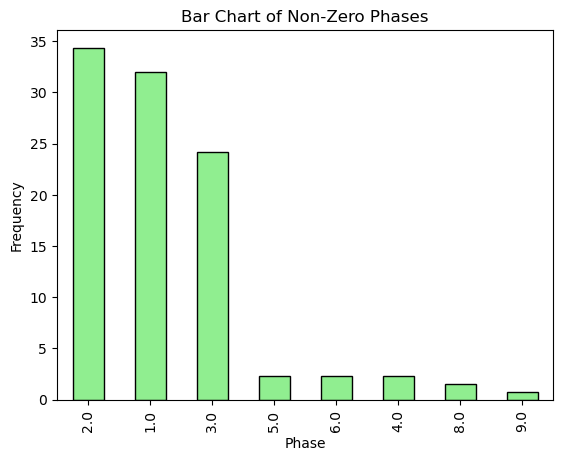

In [9]:

non_zero_phase_data = data[data['Number of Children 6months-5'] != 0]

# Count the occurrences of each unique non-zero value in the 'Phase' column
phase_counts = non_zero_phase_data['Number of Children 6months-5'].value_counts()

phase_percentages = (phase_counts / phase_counts.sum()) * 100

# Create the bar chart
phase_percentages.plot(kind='bar', color='lightgreen', edgecolor='black')

# Add titles and labels
plt.title('Bar Chart of Non-Zero Phases')
plt.xlabel('Phase')
plt.ylabel('Frequency')

# Show the plot
plt.show()

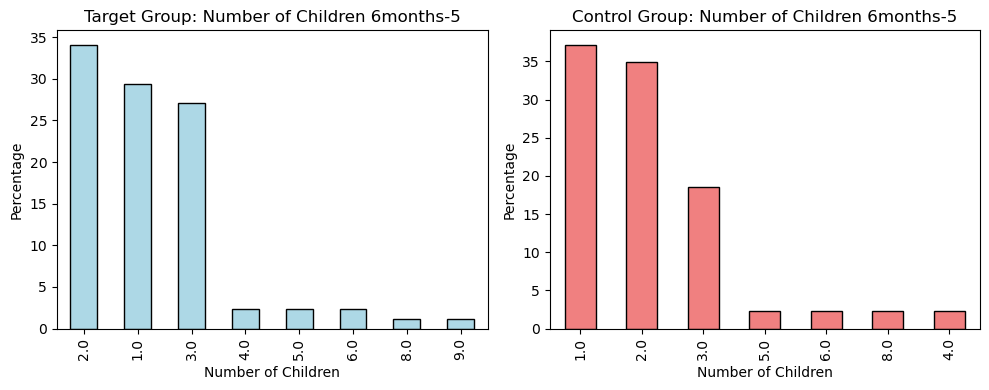

In [10]:


# Filter the dataset for the target group ('Target Binary' == 1) and exclude zeros in 'Number of Children 6months-5'
target_data = data[(data['Target Binary'] == 1) & (data['Number of Children 6months-5'] != 0)]
# Count the occurrences and calculate percentages
target_counts = target_data['Number of Children 6months-5'].value_counts()
target_percentages = (target_counts / target_counts.sum()) * 100

# Filter the dataset for the control group ('Target Binary' == 0) and exclude zeros in 'Number of Children 6months-5'
control_data = data[(data['Target Binary'] == 0) & (data['Number of Children 6months-5'] != 0)]
# Count the occurrences and calculate percentages
control_counts = control_data['Number of Children 6months-5'].value_counts()
control_percentages = (control_counts / control_counts.sum()) * 100

# Plotting bar chart for the target group
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
target_percentages.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Target Group: Number of Children 6months-5')
plt.xlabel('Number of Children')
plt.ylabel('Percentage')

# Plotting bar chart for the control group
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
control_percentages.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Control Group: Number of Children 6months-5')
plt.xlabel('Number of Children')
plt.ylabel('Percentage')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


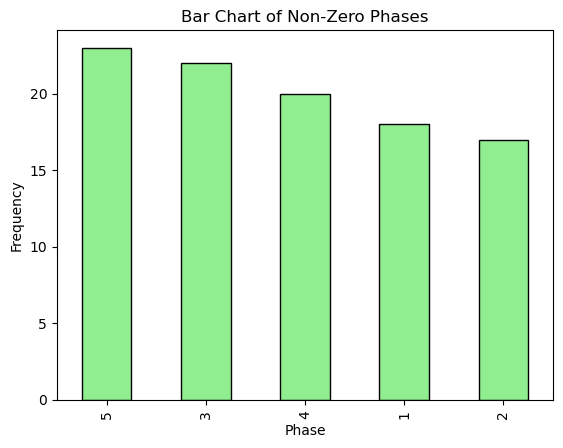

In [11]:
# Filter out rows where 'Phase' is 0
non_zero_phase_data = data[data['Phase'] != 0]

# Count the occurrences of each unique non-zero value in the 'Phase' column
phase_counts = non_zero_phase_data['Phase'].value_counts()

# Create the bar chart
phase_counts.plot(kind='bar', color='lightgreen', edgecolor='black')

# Add titles and labels
plt.title('Bar Chart of Non-Zero Phases')
plt.xlabel('Phase')
plt.ylabel('Frequency')

# Show the plot
plt.show()


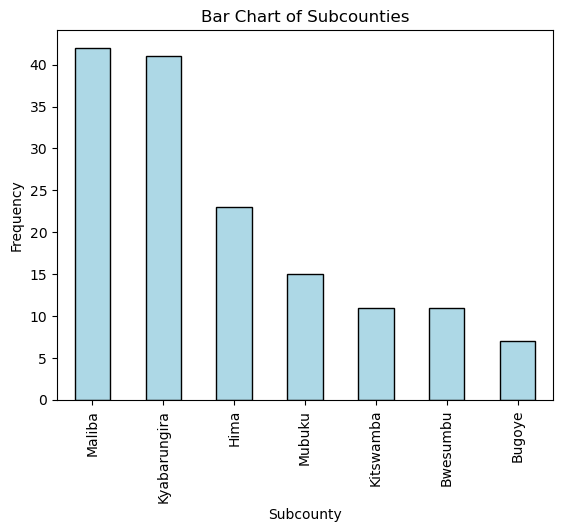

In [12]:
# Count the occurrences of each unique value in the 'Subcounty' column
subcounty_counts = data['Subcounty'].value_counts()

# Create the bar chart
subcounty_counts.plot(kind='bar', color='lightblue', edgecolor='black')

# Add titles and labels
plt.title('Bar Chart of Subcounties')
plt.xlabel('Subcounty')
plt.ylabel('Frequency')

# Show the plot
plt.show()


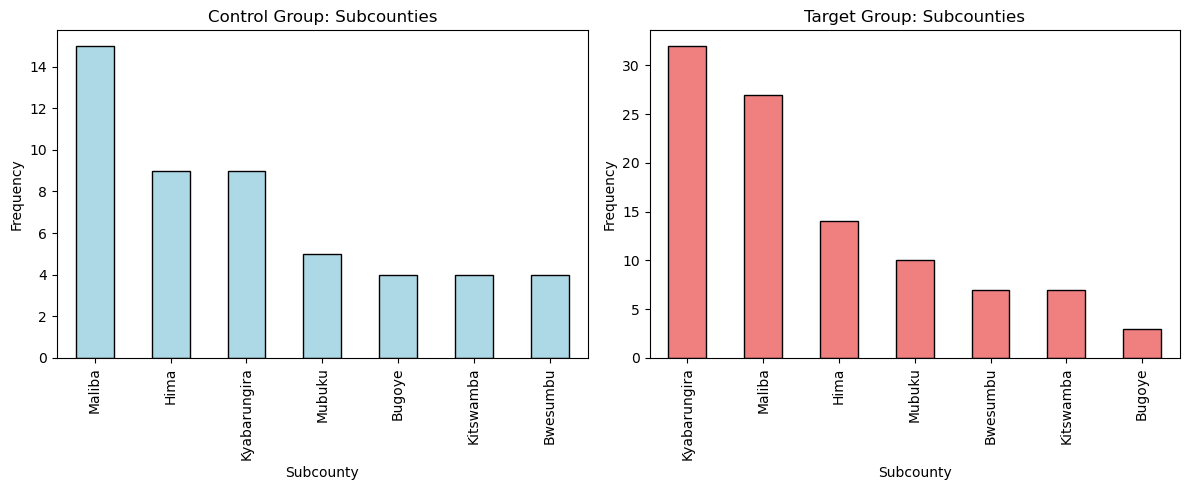

In [13]:
# Filter data for the control group ('Target Binary' == 0)
control_data = data[data['Target Binary'] == 0]
# Count the occurrences of each unique value in the 'Subcounty' column for the control group
control_subcounty_counts = control_data['Subcounty'].value_counts()

# Filter data for the target group ('Target Binary' == 1)
target_data = data[data['Target Binary'] == 1]
# Count the occurrences of each unique value in the 'Subcounty' column for the target group
target_subcounty_counts = target_data['Subcounty'].value_counts()

# Plotting bar chart for the control group
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
control_subcounty_counts.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Control Group: Subcounties')
plt.xlabel('Subcounty')
plt.ylabel('Frequency')

# Plotting bar chart for the target group
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
target_subcounty_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Target Group: Subcounties')
plt.xlabel('Subcounty')
plt.ylabel('Frequency')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


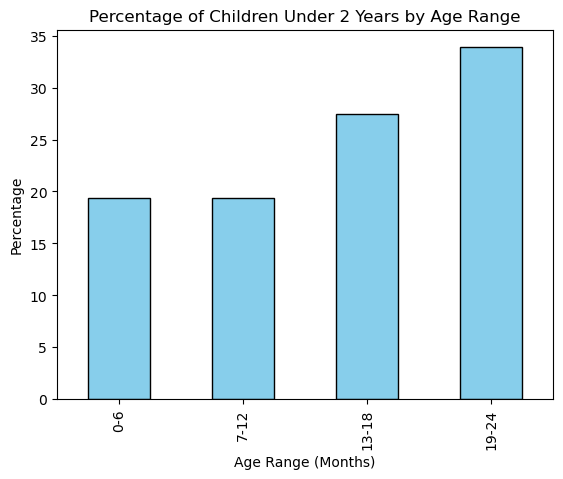

In [14]:
# Combine the two columns into one Series
ages_combined = pd.concat([data['Childunder2years1'].dropna(), data['Childunder2years2'].dropna()])

# Define the bins for the age ranges
bins = [1, 6, 12, 18, 24]

# Use pd.cut() to categorize the ages into the defined bins
age_categories = pd.cut(ages_combined, bins, right=False, labels=['0-6', '7-12', '13-18', '19-24'])

# Calculate the percentage of responses in each category
age_distribution = age_categories.value_counts(normalize=True) * 100

# Sort the categories for plotting
age_distribution = age_distribution.reindex(['0-6', '7-12', '13-18', '19-24'])

# Create the bar chart
age_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Percentage of Children Under 2 Years by Age Range')
plt.xlabel('Age Range (Months)')
plt.ylabel('Percentage')

# Show the plot
plt.show()


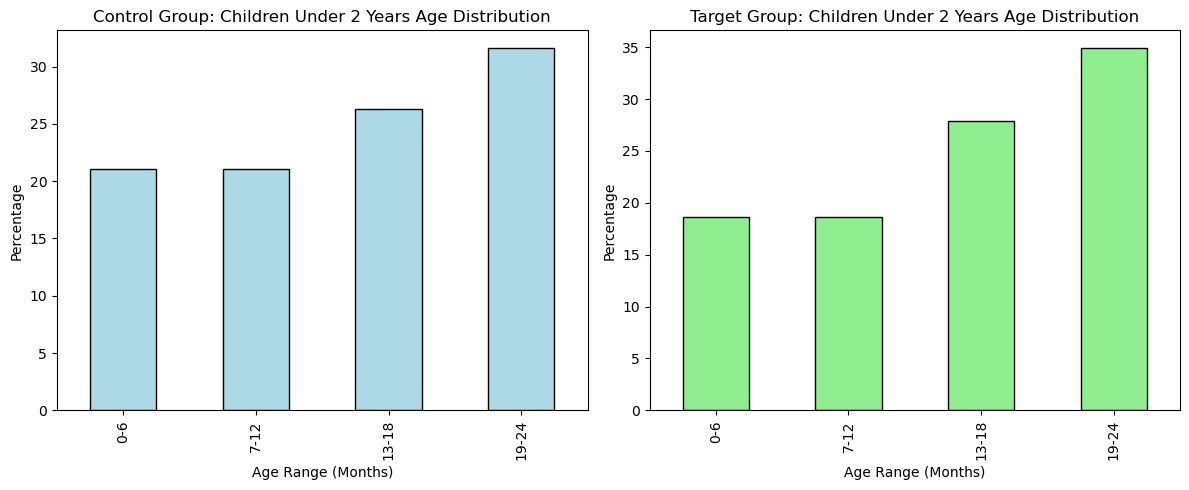

In [15]:
# Define bins for the age ranges
bins = [1, 6, 12, 18, 24]
labels = ['0-6', '7-12', '13-18', '19-24']

# Function to calculate age distribution percentages
def calculate_age_distribution(df):
    # Combine the two age columns into one Series and drop NaN values
    ages_combined = pd.concat([df['Childunder2years1'].dropna(), df['Childunder2years2'].dropna()])
    # Categorize the ages into defined bins
    age_categories = pd.cut(ages_combined, bins, right=False, labels=labels)
    # Calculate the percentage of responses in each category
    return age_categories.value_counts(normalize=True, sort=False) * 100

# Calculate age distribution for the control group ('Target Binary' == 0)
control_age_distribution = calculate_age_distribution(data[data['Target Binary'] == 0])

# Calculate age distribution for the target group ('Target Binary' == 1)
target_age_distribution = calculate_age_distribution(data[data['Target Binary'] == 1])

# Plotting bar chart for the control group
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
control_age_distribution.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Control Group: Children Under 2 Years Age Distribution')
plt.xlabel('Age Range (Months)')
plt.ylabel('Percentage')

# Plotting bar chart for the target group
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
target_age_distribution.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Target Group: Children Under 2 Years Age Distribution')
plt.xlabel('Age Range (Months)')
plt.ylabel('Percentage')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


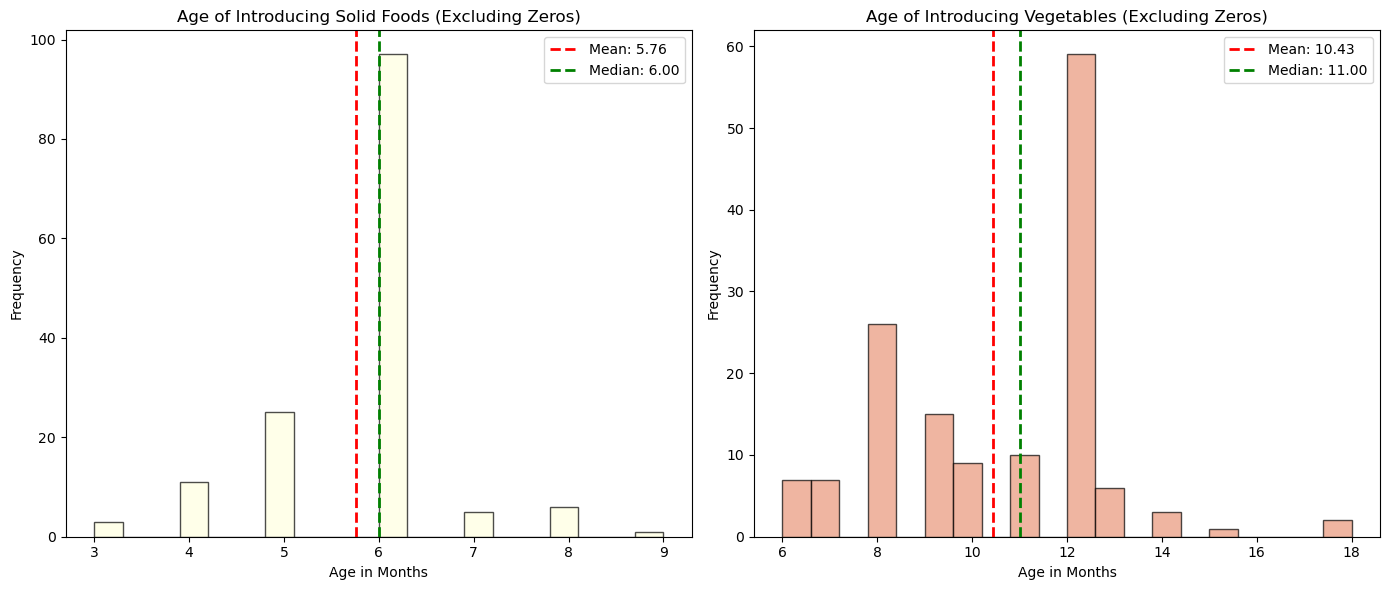

In [17]:
# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(14, 6))

# Histogram for 'Solidfoodsage' excluding zeros
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
solidfoods_data = data[data['Solidfoodsage'] > 0]['Solidfoodsage']
mean_solidfoods = solidfoods_data.mean()
median_solidfoods = solidfoods_data.median()
plt.hist(solidfoods_data, bins=20, color='lightyellow', edgecolor='black', alpha=0.7)
plt.axvline(mean_solidfoods, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_solidfoods:.2f}')
plt.axvline(median_solidfoods, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_solidfoods:.2f}')
plt.title('Age of Introducing Solid Foods (Excluding Zeros)')
plt.xlabel('Age in Months')
plt.ylabel('Frequency')
plt.legend()

# Histogram for 'Vegetablesage' excluding zeros
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
vegetables_data = data[data['Vegetablesage'] > 0]['Vegetablesage']
mean_vegetables = vegetables_data.mean()
median_vegetables = vegetables_data.median()
plt.hist(vegetables_data, bins=20, color='darksalmon', edgecolor='black', alpha=0.7)
plt.axvline(mean_vegetables, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_vegetables:.2f}')
plt.axvline(median_vegetables, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_vegetables:.2f}')
plt.title('Age of Introducing Vegetables (Excluding Zeros)')
plt.xlabel('Age in Months')
plt.ylabel('Frequency')
plt.legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()


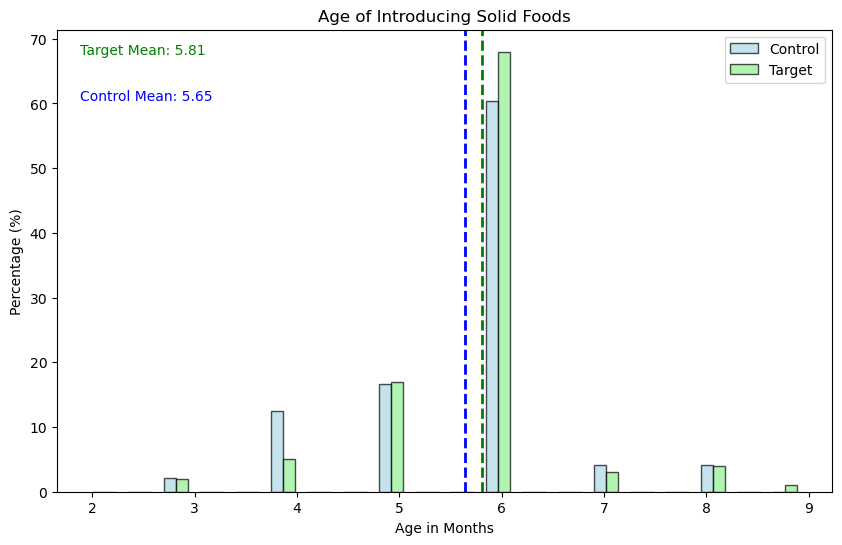

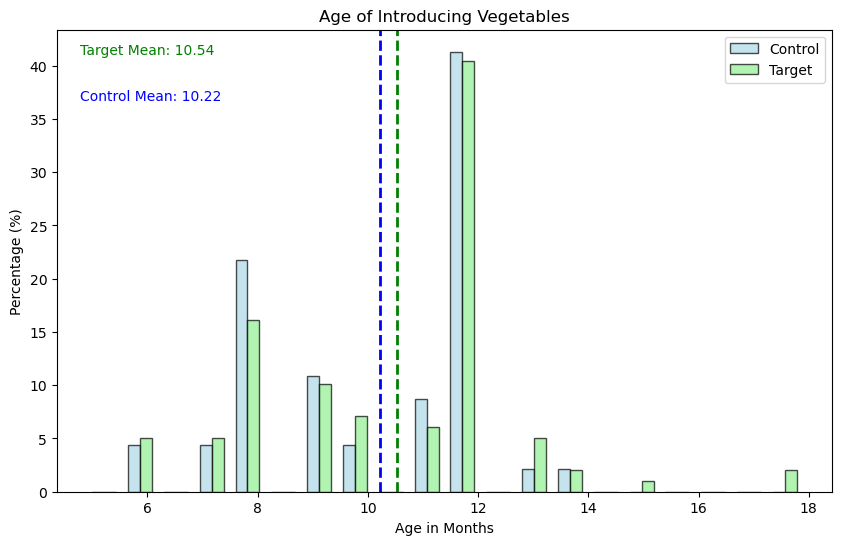

In [18]:
def create_side_by_side_histograms(data, feature, title, xlabel, ylabel, age_cutoff):
    # Filter out the specified age range and separate data by group
    target_data = data[(data['Group'] == 'Target') & (data[feature] > age_cutoff)][feature]
    control_data = data[(data['Group'] == 'Control') & (data[feature] > age_cutoff)][feature]

    # Calculate weights for each group to normalize each histogram to sum to 100%
    target_weights = np.ones_like(target_data) / target_data.size
    control_weights = np.ones_like(control_data) / control_data.size

    # Set up the figure and axes
    plt.figure(figsize=(10, 6))
    ax = plt.gca()  # Get current axis

    # Calculate the max width of data to set bins
    data_range = max(target_data.max(), control_data.max())
    bins = np.linspace(age_cutoff, data_range, 21)  # Create 20 bins starting from age_cutoff

    # Create histograms with weights to make each sum to 100%
    counts_control, bins_control, _ = ax.hist(control_data, bins=bins, weights=control_weights*100, alpha=0.7, label='Control', color='lightblue', edgecolor='black')
    counts_target, bins_target, _ = ax.hist(target_data, bins=bins, weights=target_weights*100, alpha=0.7, label='Target', color='lightgreen', edgecolor='black')

    # Calculate bar width (distance between bar edges)
    width = np.diff(bins)[0] / 3  # One third of the bin width

    # Adjust histograms to be side-by-side
    ax.clear()  # Clear the hist plot
    ax.bar(bins[:-1], counts_control, width=width, align='edge', alpha=0.7, color='lightblue', label='Control', edgecolor='black')
    ax.bar(bins[:-1] + width, counts_target, width=width, align='edge', alpha=0.7, color='lightgreen', label='Target', edgecolor='black')

    # Adding mean and median lines and annotations
    mean_target = target_data.mean()
    mean_control = control_data.mean()
    median_target = target_data.median()
    median_control = control_data.median()

    # Mean and median lines
    plt.axvline(mean_target, color='green', linestyle='dashed', linewidth=2)
    plt.axvline(mean_control, color='blue', linestyle='dashed', linewidth=2)

    # Annotations at top left
    ax.text(0.03, 0.97, f'Target Mean: {mean_target:.2f}', transform=ax.transAxes, color='green', verticalalignment='top')
    ax.text(0.03, 0.87, f'Control Mean: {mean_control:.2f}', transform=ax.transAxes, color='blue', verticalalignment='top')

    # Add titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

    # Show the plot
    plt.show()

if 'Group' not in data.columns:
    data['Group'] = data['Household Number (Code): '].apply(lambda x: 'Target' if x > 200 else 'Control')

# Create side-by-side histograms for Solidfoodsage excluding ages 0-2
create_side_by_side_histograms(data, 'Solidfoodsage', 'Age of Introducing Solid Foods', 'Age in Months', 'Percentage (%)', 2)

# Create side-by-side histograms for Vegetablesage excluding ages 0-5
create_side_by_side_histograms(data, 'Vegetablesage', 'Age of Introducing Vegetables', 'Age in Months', 'Percentage (%)', 5)


In [21]:
# Calculate the percentage of "Yes" responses in column 23
yes_percentage_overall = (data['23. Was there anything different about your meals during the last 24h as compared to an average day?'] == 'Yes').mean() * 100

# Print the result
print(f"Overall percentage of 'Yes' responses in Column 23: {yes_percentage_overall:.2f}%")


Overall percentage of 'Yes' responses in Column 23: 22.00%


In [22]:
# Filter the dataset for 'Target Binary' == 0
data_target_0 = data[data['Target Binary'] == 0]
yes_percentage_target_0 = (data_target_0['23. Was there anything different about your meals during the last 24h as compared to an average day?'] == 'Yes').mean() * 100

# Filter the dataset for 'Target Binary' == 1
data_target_1 = data[data['Target Binary'] == 1]
yes_percentage_target_1 = (data_target_1['23. Was there anything different about your meals during the last 24h as compared to an average day?'] == 'Yes').mean() * 100

# Print the results
print(f"Percentage of 'Yes' responses in Column 23 for 'Target Binary' = 0: {yes_percentage_target_0:.2f}%")
print(f"Percentage of 'Yes' responses in Column 23 for 'Target Binary' = 1: {yes_percentage_target_1:.2f}%")


Percentage of 'Yes' responses in Column 23 for 'Target Binary' = 0: 10.00%
Percentage of 'Yes' responses in Column 23 for 'Target Binary' = 1: 28.00%


In [23]:
# List of food group columns
food_groups = [
    'Liquids/3. Milk (Fresh cow milk, condensed milk, powdered milk) or yogurt',
    'Liquids/4. Coffee or Tea',
    'Liquids/5. Fresh Fruit Juice',
    'Liquids/6.  Soda',
    'Liquids/7. Other Liquids',
    '8. Basic Foods',
    '9. Orange/Yellow Vegetables & Starches',
    '10. Other Starches',
    '11. Dark Leafy Greens',
    '12. Other Vegetables',
    '13. Vitamin A Rich Fruits',
    '14. Other Fruits',
    '15. Meats',
    '16. Eggs',
    '17. Fish',
    '18. Beans and Nuts',
    '19. Sweets',
    '20. Sugars',
    '21. Packaged Foods'
]

# Calculate the percentage of households consuming each product
consumption_percentages = data[food_groups].apply(lambda x: (x != 0).mean() * 100)

# Display the results
print("Percentage of households consuming each food group:")
print(consumption_percentages)


Percentage of households consuming each food group:
Liquids/3. Milk (Fresh cow milk, condensed milk, powdered milk) or yogurt      6.666667
Liquids/4. Coffee or Tea                                                      46.000000
Liquids/5. Fresh Fruit Juice                                                  12.000000
Liquids/6.  Soda                                                               2.000000
Liquids/7. Other Liquids                                                       8.000000
8. Basic Foods                                                               100.000000
9. Orange/Yellow Vegetables & Starches                                        16.666667
10. Other Starches                                                            76.666667
11. Dark Leafy Greens                                                         86.666667
12. Other Vegetables                                                          99.333333
13. Vitamin A Rich Fruits                                           

In [33]:
# If 'consumption_percentages' is a Series, convert it to a DataFrame
if isinstance(consumption_percentages, pd.Series):
    consumption_percentages = consumption_percentages.to_frame()

# Export the DataFrame to an Excel file
consumption_percentages.to_excel("consumption_percentages.xlsx", index=True, sheet_name="Consumption Percentages")

# Confirm completion
print("Exported to Excel successfully.")


Exported to Excel successfully.


In [24]:
# List of food group columns
food_groups = [
    'Liquids/3. Milk (Fresh cow milk, condensed milk, powdered milk) or yogurt',
    'Liquids/4. Coffee or Tea',
    'Liquids/5. Fresh Fruit Juice',
    'Liquids/6.  Soda',
    'Liquids/7. Other Liquids',
    '8. Basic Foods',
    '9. Orange/Yellow Vegetables & Starches',
    '10. Other Starches',
    '11. Dark Leafy Greens',
    '12. Other Vegetables',
    '13. Vitamin A Rich Fruits',
    '14. Other Fruits',
    '15. Meats',
    '16. Eggs',
    '17. Fish',
    '18. Beans and Nuts',
    '19. Sweets',
    '20. Sugars',
    '21. Packaged Foods'
]

# Filter data for the target and control groups
target_data = data[data['Target Binary'] == 1]
control_data = data[data['Target Binary'] == 0]

# Calculate consumption percentages for the target group
target_percentages = target_data[food_groups].apply(lambda x: (x != 0).mean() * 100)

# Calculate consumption percentages for the control group
control_percentages = control_data[food_groups].apply(lambda x: (x != 0).mean() * 100)

# Calculate the difference in percentages between target and control groups
percentage_differences = target_percentages - control_percentages

# Display the results
print("Percentage of target households consuming each food group:")
print(target_percentages)
print("\nPercentage of control households consuming each food group:")
print(control_percentages)
print("\nDifference in percentages between target and control groups:")
print(percentage_differences)


Percentage of target households consuming each food group:
Liquids/3. Milk (Fresh cow milk, condensed milk, powdered milk) or yogurt      8.0
Liquids/4. Coffee or Tea                                                      51.0
Liquids/5. Fresh Fruit Juice                                                  13.0
Liquids/6.  Soda                                                               3.0
Liquids/7. Other Liquids                                                       8.0
8. Basic Foods                                                               100.0
9. Orange/Yellow Vegetables & Starches                                        16.0
10. Other Starches                                                            78.0
11. Dark Leafy Greens                                                         93.0
12. Other Vegetables                                                         100.0
13. Vitamin A Rich Fruits                                                     77.0
14. Other Fruits            

In [35]:
# Create an ExcelWriter object for the desired Excel file
with pd.ExcelWriter('percentages_comparison.xlsx') as writer:
    # If the objects are Series, convert them to DataFrames before writing
    if isinstance(target_percentages, pd.Series):
        target_percentages.to_frame(name='Target Percentages').to_excel(writer, sheet_name='Target Percentages')
    else:
        target_percentages.to_excel(writer, sheet_name='Target Percentages')
    
    if isinstance(control_percentages, pd.Series):
        control_percentages.to_frame(name='Control Percentages').to_excel(writer, sheet_name='Control Percentages')
    else:
        control_percentages.to_excel(writer, sheet_name='Control Percentages')
    
    if isinstance(percentage_differences, pd.Series):
        percentage_differences.to_frame(name='Percentage Differences').to_excel(writer, sheet_name='Percentage Differences')
    else:
        percentage_differences.to_excel(writer, sheet_name='Percentage Differences')

# Confirm completion
print("Exported to Excel successfully.")


Exported to Excel successfully.


In [25]:
data['Vegetables'] = data[['9. Orange/Yellow Vegetables & Starches', '11. Dark Leafy Greens', '12. Other Vegetables']].astype(str).agg(' '.join, axis=1)
data['Fruits'] = data[['Liquids/5. Fresh Fruit Juice', '14. Other Fruits', '13. Vitamin A Rich Fruits']].astype(str).agg(' '.join, axis=1)
data['Miscellaneous'] = data[['19. Sweets', '21. Packaged Foods']].astype(str).agg(' '.join, axis=1)

# Print or display the updated DataFrame
print(data)



                      start                     end  \
0   2023-11-24 12:23:17.627 2023-11-30 10:59:18.736   
1   2023-11-24 12:05:48.281 2023-12-04 12:02:33.970   
2   2023-11-28 21:17:54.267 2023-12-01 17:38:05.700   
3   2023-12-01 13:08:18.994 2023-12-06 20:01:44.732   
4   2023-12-04 13:23:52.056 2023-12-04 18:38:36.291   
..                      ...                     ...   
145 2023-11-22 10:46:42.776 2023-11-30 10:35:11.746   
146 2023-11-23 10:19:01.098 2023-11-30 10:47:54.077   
147 2023-11-23 09:57:32.922 2023-11-30 10:50:19.460   
148 2023-11-22 19:27:12.621 2023-11-30 10:54:32.709   
149 2023-11-22 19:11:35.821 2023-11-30 10:57:18.333   

     Household Number (Code):         Village: Subcounty  Phase  \
0                            1         KAKINDO    Maliba      0   
1                            2         KAKINDO    Maliba      0   
2                            8         KAKINDO    Maliba      0   
3                            9          Kyanya    Maliba      0   
4   

In [26]:
selected_columns = [
    '8. Basic Foods', '10. Other Starches', '15. Meats', '16. Eggs', 
                    '17. Fish', '18. Beans and Nuts', 'Liquids/3. Milk (Fresh cow milk, condensed milk, powdered milk) or yogurt', 
                    '20. Sugars', 'Vegetables', 'Fruits', 'Miscellaneous'
]

# Create a copy of the selected columns
HDDS = data[selected_columns].copy()

# Identify columns with "a b c" format
abc_format_columns = ['Vegetables', 'Fruits', 'Miscellaneous']

# Function to process "a b c" formatted string or numeric values
def process_abc_format(value):
    # Check if the value is a string and contains space, indicating "a b c" format
    if isinstance(value, str) and ' ' in value:
        # Split the string by spaces, check each part if it's "0" or "0.0"
        parts = value.split()
        return 0 if all(part.strip() in ['0', '0.0'] for part in parts) else 1
    else:
        # For numeric values or single-part strings, check if they are equivalent to zero
        return 0 if value in [0, '0', '0.0', 0.0] else 1

# Apply custom transformation for "a b c" format columns first
for column in abc_format_columns:
    HDDS[column] = HDDS[column].apply(process_abc_format)

# Normalize all values: treat "0.0" as 0, and then apply binary transformation
HDDS = HDDS.applymap(lambda x: 0 if x in [0, '0', '0.0', 0.0] else 1)

# Create a new column that sums the binary columns
HDDS['Sum_Binary'] = HDDS.sum(axis=1)

# Print or display the binary data
print(HDDS)


     8. Basic Foods  10. Other Starches  15. Meats  16. Eggs  17. Fish  \
0                 1                   1          0         0         0   
1                 1                   1          0         0         1   
2                 1                   1          0         0         1   
3                 1                   1          0         0         0   
4                 1                   1          0         0         0   
..              ...                 ...        ...       ...       ...   
145               1                   1          0         0         0   
146               1                   1          1         0         0   
147               1                   0          1         0         0   
148               1                   0          0         0         0   
149               1                   1          0         1         0   

     18. Beans and Nuts  \
0                     1   
1                     1   
2                     1   
3  

In [27]:
HDDS.mean()

8. Basic Foods                                                               1.000000
10. Other Starches                                                           0.766667
15. Meats                                                                    0.206667
16. Eggs                                                                     0.073333
17. Fish                                                                     0.480000
18. Beans and Nuts                                                           0.940000
Liquids/3. Milk (Fresh cow milk, condensed milk, powdered milk) or yogurt    0.066667
20. Sugars                                                                   0.813333
Vegetables                                                                   1.000000
Fruits                                                                       0.826667
Miscellaneous                                                                0.466667
Sum_Binary                                            

In [28]:
data1 = data.join(HDDS['Sum_Binary'], lsuffix='_data', rsuffix='_binary_data')

data1

,start,end,Household Number (Code):,Village:,Subcounty,Phase,Total number of people living in the household (most of the time):,Respondent Age:,Childunder2years1,Childunder2years2,...,23. Was there anything different about your meals during the last,_id,Number of Children Age 2:,Number of Children 6months-5,Target Binary,Group,Vegetables,Fruits,Miscellaneous,Sum_Binary
0,2023-11-24 12:23:17.627,2023-11-30 10:59:18.736,1,KAKINDO,Maliba,0,9,40,17.0,1.0,...,0,290467466,1,2.0,0,Control,0 Dodo Tomatoes African Eggplant Onion,"0.0 Citrus (Orange, Lemons) Jackfruit Guava P...",0 0,6
1,2023-11-24 12:05:48.281,2023-12-04 12:02:33.970,2,KAKINDO,Maliba,0,7,60,11.0,0.0,...,0,290467460,1,3.0,0,Control,0 Cassava Leaves Tomatoes Eggplant Onion Green...,0.0 Bananas Jackfruit Green Mango Ripe Mango,0 0,7
2,2023-11-28 21:17:54.267,2023-12-01 17:38:05.700,8,KAKINDO,Maliba,0,4,23,20.0,0.0,...,0,292618271,1,2.0,0,Control,0 Dodo Tomatoes Eggplant Onion,0.0 Jackfruit Ripe Mango Avocados,Mandazi (Sweet Bread) 0,8
3,2023-12-01 13:08:18.994,2023-12-06 20:01:44.732,9,Kyanya,Maliba,0,8,35,0.0,0.0,...,0,294187269,0,1.0,0,Control,Yellow Sweet Potato Dodo Tomatoes Cabbage Onion,0.0 Bananas Ripe Papaya Avocados,0 0,5
4,2023-12-04 13:23:52.056,2023-12-04 18:38:36.291,10,Kyanya,Maliba,0,7,23,0.0,0.0,...,0,293385381,0,2.0,0,Control,0 0 Tomatoes Onion,0.0 0 Avocados,0 0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2023-11-22 10:46:42.776,2023-11-30 10:35:11.746,313,IZINGA,Mubuku,3,7,34,9.0,0.0,...,0,289809023,1,3.0,1,Target,0 Dodo Sukumawiki Tomatoes African Eggplant Onion,"0.0 Bananas Citrus (Orange, Lemons) Green Mang...",Pancakes 0,7
146,2023-11-23 10:19:01.098,2023-11-30 10:47:54.077,314,Kigando,Mubuku,2,9,35,0.0,0.0,...,0,290155171,0,1.0,1,Target,0 Dodo Tomatoes Eggplant Onion,0.0 0 0,0 0,6
147,2023-11-23 09:57:32.922,2023-11-30 10:50:19.460,315,Mubuku Central,Mubuku,4,7,75,12.0,0.0,...,0,290155900,1,2.0,1,Target,0 Dodo Tomatoes Onion,1.0 0 0,0 0,6
148,2023-11-22 19:27:12.621,2023-11-30 10:54:32.709,316,Mubuku Central,Mubuku,2,6,80,0.0,0.0,...,0,290158144,0,0.0,1,Target,0 Dodo Tomatoes Onion,0.0 0 0,0 0,4


In [29]:
target = data1[data1['Household Number (Code): '] > 200]
control = data1[data1['Household Number (Code): '] < 200]

# Calculate the mean of the Sum_Binary column for both groups
mean_target = target['Sum_Binary'].mean()
mean_control = control['Sum_Binary'].mean()

print(f"Mean of Sum_Binary for target group: {mean_target}")
print(f"Mean of Sum_Binary for control group: {mean_control}")

Mean of Sum_Binary for target group: 6.77
Mean of Sum_Binary for control group: 6.38


In [ ]:
file1 = 'data1.xlsx'

# Save the DataFrame to an Excel file
# Note: This requires the openpyxl library, install it if needed
data1.to_excel(filename, index=False)

print(f'Data saved to {file1}.')


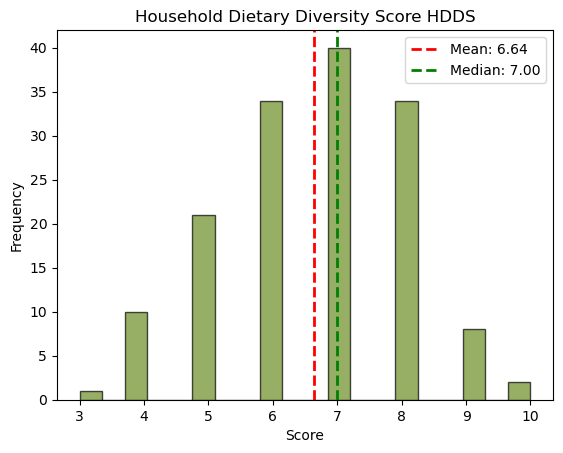

In [31]:
# Calculate the mean of the 'Sum_Binary' column
mean_sum_binary = data1['Sum_Binary'].mean()

# Calculate the median of the 'Sum_Binary1' column
median_sum_binary = data1['Sum_Binary'].median()

# Create the histogram
plt.hist(data1['Sum_Binary'], bins=20, alpha=0.7, color='olivedrab', edgecolor='black')

# Draw a vertical line at the mean value
plt.axvline(mean_sum_binary, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_sum_binary:.2f}')

# Draw a vertical line at the median value
plt.axvline(median_sum_binary, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_sum_binary:.2f}')

# Add legend
plt.legend()

# Add titles and labels
plt.title('Household Dietary Diversity Score HDDS')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()


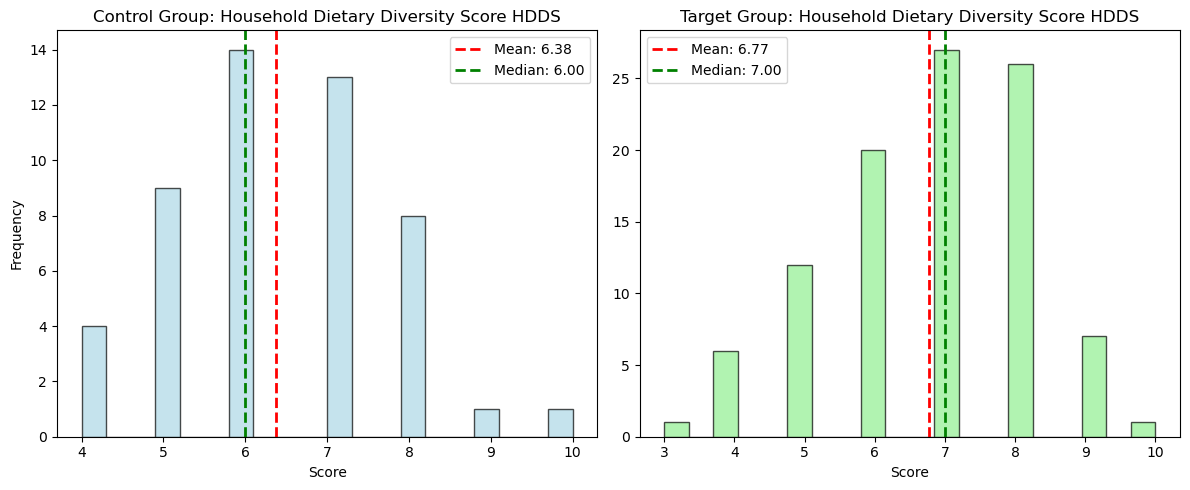

In [33]:
# Filter data for the control group ('Target Binary' == 0)
control_data = data1[data1['Target Binary'] == 0]
# Calculate the mean of 'Sum_Binary' for the control group
mean_sum_binary_control = control_data['Sum_Binary'].mean()
median_sum_binary_control = control_data['Sum_Binary'].median()

# Filter data for the target group ('Target Binary' == 1)
target_data = data1[data1['Target Binary'] == 1]
# Calculate the mean of 'Sum_Binary' for the target group
mean_sum_binary_target = target_data['Sum_Binary'].mean()
median_sum_binary_target = target_data['Sum_Binary'].median()

# Create the histogram for the control group
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(control_data['Sum_Binary'], bins=20, alpha=0.7, color='lightblue', edgecolor='black')
plt.axvline(mean_sum_binary_control, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_sum_binary_control:.2f}')
plt.axvline(median_sum_binary_control, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_sum_binary_control:.2f}')
plt.legend()
plt.title('Control Group: Household Dietary Diversity Score HDDS')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Create the histogram for the target group
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(target_data['Sum_Binary'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.axvline(mean_sum_binary_target, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_sum_binary_target:.2f}')
plt.axvline(median_sum_binary_target, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_sum_binary_target:.2f}')
plt.legend()
plt.title('Target Group: Household Dietary Diversity Score HDDS')
plt.xlabel('Score')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [34]:
# Filter the data into target and control groups
target_group = data1[data1['Household Number (Code): '] > 200]['Sum_Binary']
control_group = data1[data1['Household Number (Code): '] < 200]['Sum_Binary']

# Calculate the means and standard deviations
target_mean = target_group.mean()
control_mean = control_group.mean()
target_std = target_group.std()
control_std = control_group.std()

print(f"Target Group Mean: {target_mean}, Standard Deviation: {target_std}")
print(f"Control Group Mean: {control_mean}, Standard Deviation: {control_std}")

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(target_group, control_group)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference in means is statistically significant.")
else:
    print("The difference in means is not statistically significant.")

Target Group Mean: 6.77, Standard Deviation: 1.4060116240162046
Control Group Mean: 6.38, Standard Deviation: 1.3384425917567668
T-statistic: 1.6269191284901916, P-value: 0.10588150094047948
The difference in means is not statistically significant.


In [35]:
# Calculate quartiles for the entire dataset to ensure consistent binning
quartiles = data1['Sum_Binary'].quantile([0.25, 0.5, 0.75])
# Define the bin edges
min_value = data1['Sum_Binary'].min()
max_value = data1['Sum_Binary'].max() + 0.01  # Add a small value to ensure the max value is included

# Define bins including the very minimum to slightly above the maximum
bins = [min_value, quartiles[0.25], quartiles[0.5], quartiles[0.75], max_value]

# Create a categorical column for all households using custom labels and including the lowest value
data1['Quartile'] = pd.cut(data1['Sum_Binary'], bins=bins, labels=['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile'], include_lowest=True, right=False)

# Generate and print interval labels for clear presentation
interval_labels = [(f"[{bins[i]}, {bins[i+1]})") for i in range(len(bins)-1)]

# Frequency table for all households
all_households_freq = data1['Quartile'].value_counts().sort_index()

# Combine frequencies with interval labels
all_households_freq = all_households_freq.rename(index=dict(zip(['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile'], interval_labels)))

# Filter data for the control and target groups
control_data = data1[data1['Target Binary'] == 0]
target_data = data1[data1['Target Binary'] == 1]

# Frequency table for the control group
control_freq = control_data['Quartile'].value_counts().sort_index()
control_freq = control_freq.rename(index=dict(zip(['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile'], interval_labels)))

# Frequency table for the target group
target_freq = target_data['Quartile'].value_counts().sort_index()
target_freq = target_freq.rename(index=dict(zip(['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile'], interval_labels)))

# Print the frequency tables with intervals
print("Frequency Table for All Households (with Intervals):")
print(all_households_freq)
print("\nFrequency Table for Control Group (with Intervals):")
print(control_freq)
print("\nFrequency Table for Target Group (with Intervals):")
print(target_freq)


Frequency Table for All Households (with Intervals):
[3, 6.0)        32
[6.0, 7.0)      34
[7.0, 8.0)      40
[8.0, 10.01)    44
Name: Quartile, dtype: int64

Frequency Table for Control Group (with Intervals):
[3, 6.0)        13
[6.0, 7.0)      14
[7.0, 8.0)      13
[8.0, 10.01)    10
Name: Quartile, dtype: int64

Frequency Table for Target Group (with Intervals):
[3, 6.0)        19
[6.0, 7.0)      20
[7.0, 8.0)      27
[8.0, 10.01)    34
Name: Quartile, dtype: int64


In [36]:
# Filter data1 for the target group
target_data = data1[data1['Target Binary'] == 1]

# Then apply the groupby and mean calculation as shown above
average_sum_binary_by_phase1 = target_data.groupby('Phase')['Sum_Binary'].mean().sort_index()

# Display the results
print("Average Sum_Binary_binary_data for each phase in the target group:")
print(average_sum_binary_by_phase1)


Average Sum_Binary_binary_data for each phase in the target group:
Phase
1    6.833333
2    6.294118
3    6.954545
4    6.700000
5    6.956522
Name: Sum_Binary, dtype: float64


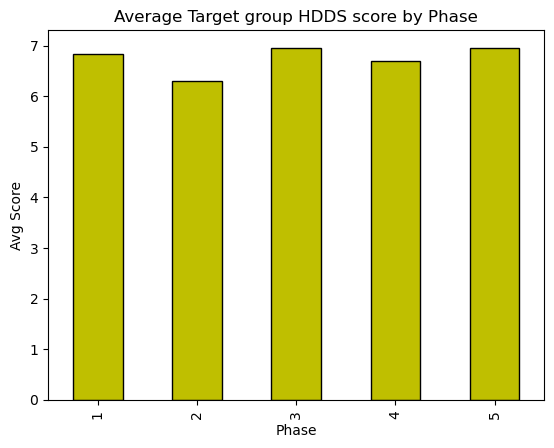

In [37]:
# Create the bar chart
average_sum_binary_by_phase1.plot(kind='bar', color='y', edgecolor='black')

# Add titles and labels
plt.title('Average Target group HDDS score by Phase')
plt.xlabel('Phase')
plt.ylabel('Avg Score')

# Show the plot
plt.show()


In [38]:
# Filter data1 for the target group
target_data = data1[data1['Target Binary'] == 1]

# Then apply the groupby and mean calculation as shown above
average_sum_binary_by_phase2 = target_data.groupby('Subcounty')['Sum_Binary'].mean().sort_values(ascending=False)

# Display the results
print("Average Sum_Binary_binary_data for each phase in the target group:")
print(average_sum_binary_by_phase2)


Average Sum_Binary_binary_data for each phase in the target group:
Subcounty
Bugoye          7.333333
Kitswamba       7.285714
Maliba          7.037037
Bwesumbu        6.857143
Kyabarungira    6.812500
Mubuku          6.400000
Hima            6.000000
Name: Sum_Binary, dtype: float64


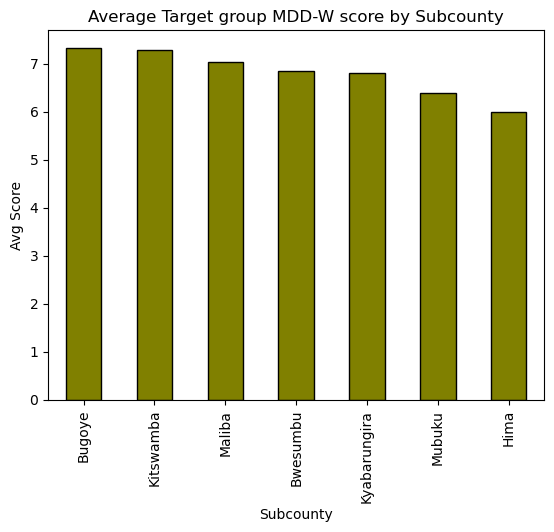

In [39]:
# Create the bar chart
average_sum_binary_by_phase2.plot(kind='bar', color='olive', edgecolor='black')

# Add titles and labels
plt.title('Average Target group MDD-W score by Subcounty')
plt.xlabel('Subcounty')
plt.ylabel('Avg Score')

# Show the plot
plt.show()
